In [13]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import dlib
from skimage.feature import hog

In [34]:
image_colour = mpimg.imread('pictures/face_unsplash.jpg')

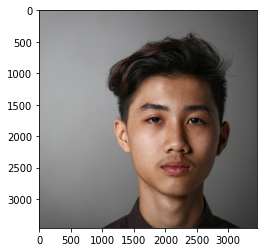

In [35]:
plt.imshow(image_colour)

In [4]:
image_colour.shape

(3456, 3456, 3)

In [5]:
image_gray = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)

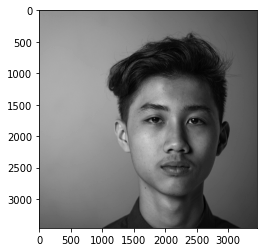

In [69]:
plt.imshow(image_gray, cmap='gray')

In [70]:
image_gray.shape

(3456, 3456)

In [88]:
image_gray_small = cv2.resize(image_gray, (0,0), fx=0.125, fy=0.125)

In [89]:
image_gray_small.shape

(432, 432)

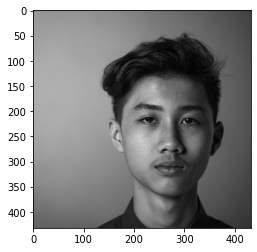

In [90]:
plt.imshow(image_gray_small, cmap='gray')

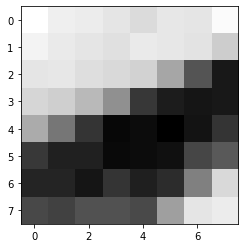

In [134]:
plt.imshow(image_gray_small[212:220, 212:220], cmap='gray')

In [100]:
cv2.imwrite('eye.jpg', image_gray_small[210:230, 210:250])

True

In [99]:
image_gray_small[218:221, 220:223]

array([[128, 136, 119],
       [142, 132, 147],
       [136, 148, 161]], dtype=uint8)

In [109]:
x_sobel = cv2.Sobel(image_gray_small, cv2.CV_64F, 0, 1, ksize = 1)

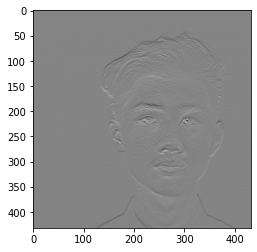

In [110]:
plt.imshow(x_sobel, cmap='gray')

In [116]:
cv2.imwrite('pictures/x_sobel.jpg', x_sobel)

True

In [111]:
y_sobel = cv2.Sobel(image_gray_small, cv2.CV_64F, 1, 0, ksize = 1)

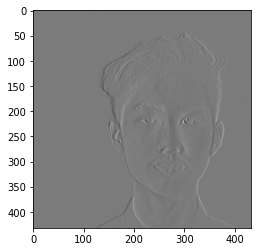

In [112]:
plt.imshow(y_sobel, cmap='gray')

In [117]:
cv2.imwrite('pictures/y_sobel.jpg', y_sobel)

True

In [177]:
mag, angle = cv2.cartToPolar(x_sobel, y_sobel, angleInDegrees=True)

In [178]:
mag.shape

(432, 432)

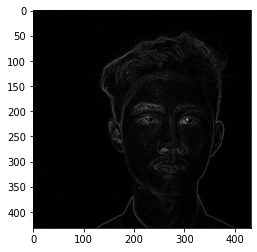

In [179]:
plt.imshow(mag, cmap='gray')

In [180]:
angle.shape

(432, 432)

In [181]:
angle = np.round(angle[212:220, 212:220], decimals=0)

In [176]:
[round(x,0) if x < 180 else round(x-180,0) for y in angle[212:220, 212:220] for x in y][-8:]

[14.0, 13.0, 15.0, 168.0, 42.0, 59.0, 43.0, 63.0]

In [150]:
sign(angle)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [141]:
np.round(mag[212:220, 212:220],decimals=0)

array([[ 25.,  18.,   5.,   7.,   1.,   6.,   8.,  13.],
       [ 15.,   7.,   7.,   5.,   5.,  27.,  61., 101.],
       [ 12.,  11.,  19.,  33.,  77.,  99., 103.,  81.],
       [ 25.,  49.,  75., 102.,  95.,  70.,  27.,  17.],
       [ 72.,  87.,  78.,  59.,  18.,   6.,  30.,  30.],
       [ 63.,  35.,  16.,  21.,   9.,  31.,  54.,  79.],
       [  6.,  14.,  21.,  30.,  26.,  71.,  97.,  88.],
       [ 30.,  18.,  28.,  14.,  47.,  75.,  47.,  39.]])

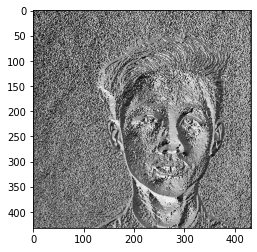

In [128]:
plt.imshow(angle, cmap='gray')

In [118]:
cv2.imwrite('pictures/magnitude.jpg', mag)

True

In [129]:
cv2.imwrite('pictures/angle.jpg', angle)

True

In [192]:
features, hog_image = hog(image_gray_small, 
                          orientations = 9, 
                          pixels_per_cell = (16, 16),
                          transform_sqrt=False,
                         visualize = True,
                         feature_vector = False)

In [193]:
features.shape

(25, 25, 3, 3, 9)

In [194]:
hog_image.shape

(432, 432)

In [195]:
from skimage import exposure

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,2))

In [200]:
hog_image_rescaled[150:200, 200:250]

array([[1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.3314456 ],
       [1.        , 0.81962752, 0.81962752, ..., 1.        , 1.        ,
        0.55261004],
       [1.        , 0.64743806, 0.64743806, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.72008163, 1.        , 1.        , ..., 0.80451167, 0.88935441,
        0.78504384],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.68448538],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

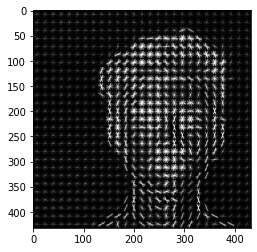

In [196]:
plt.imshow(hog_image_rescaled, cmap='gray')

In [203]:
hog_image_rescaled = 255 * (hog_image_rescaled - hog_image_rescaled.min() / (hog_image_rescaled.max() - hog_image_rescaled.min()))
hog_image_rescaled = np.array(hog_image_rescaled, np.int)
cv2.imwrite('pictures/hog_exposed.png', hog_image_rescaled)

True

In [37]:
ffd = dlib.get_frontal_face_detector()
detected = ffd(image_gray.astype(np.uint8), 0)

def dlib_to_cv_bounding_box(box):
    x = box.left()
    y = box.top()
    w = box.right() - x
    h = box.bottom() - y
    return x, y, w, h

img = image_colour.copy()

for face in detected:
    x, y, w, h = dlib_to_cv_bounding_box(face)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

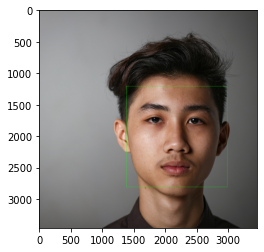

In [38]:
plt.imshow(img)

In [39]:
image_mask = mpimg.imread('pictures/face_unsplash_hog.jpg')

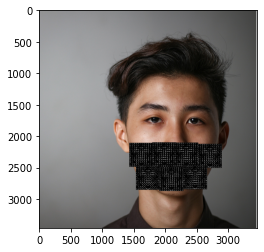

In [40]:
plt.imshow(image_mask)

In [41]:
image_mask_gray = cv2.cvtColor(image_mask, cv2.COLOR_BGR2GRAY)

In [43]:
ffd = dlib.get_frontal_face_detector()
detected = ffd(image_mask_gray.astype(np.uint8), 0)

def dlib_to_cv_bounding_box(box):
    x = box.left()
    y = box.top()
    w = box.right() - x
    h = box.bottom() - y
    return x, y, w, h

img_hog = image_mask.copy()

for face in detected:
    x, y, w, h = dlib_to_cv_bounding_box(face)
    cv2.rectangle(img_hog, (x,y), (x+w, y+h), (0, 255, 0), 2)

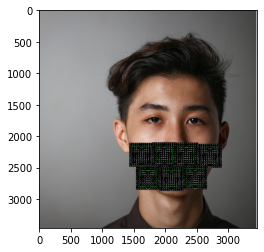

In [45]:
plt.imshow(img_hog)

In [46]:
image_black_mask = mpimg.imread('pictures/face_unsplash_black_mask.jpg')
image_black_mask_gray = cv2.cvtColor(image_black_mask, cv2.COLOR_BGR2GRAY)

In [47]:
ffd = dlib.get_frontal_face_detector()
detected = ffd(image_black_mask_gray.astype(np.uint8), 0)

def dlib_to_cv_bounding_box(box):
    x = box.left()
    y = box.top()
    w = box.right() - x
    h = box.bottom() - y
    return x, y, w, h

img_black_mask_hog = image_black_mask.copy()

for face in detected:
    x, y, w, h = dlib_to_cv_bounding_box(face)
    cv2.rectangle(img_black_mask_hog, (x,y), (x+w, y+h), (0, 255, 0), 2)

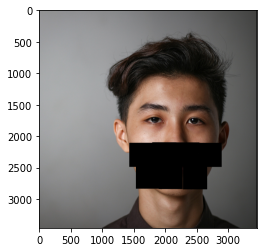

In [48]:
plt.imshow(img_black_mask_hog)

In [49]:
image_facemask = mpimg.imread('pictures/facemask.jpg')
image_facemask_gray = cv2.cvtColor(image_facemask, cv2.COLOR_BGR2GRAY)

In [50]:
ffd = dlib.get_frontal_face_detector()
detected = ffd(image_facemask_gray.astype(np.uint8), 0)

def dlib_to_cv_bounding_box(box):
    x = box.left()
    y = box.top()
    w = box.right() - x
    h = box.bottom() - y
    return x, y, w, h

image_facemask_hog = image_facemask.copy()

for face in detected:
    x, y, w, h = dlib_to_cv_bounding_box(face)
    cv2.rectangle(image_facemask_hog, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [52]:
image_protest = mpimg.imread('pictures/protest.jpg')
image_protest_gray = cv2.cvtColor(image_protest, cv2.COLOR_BGR2GRAY)

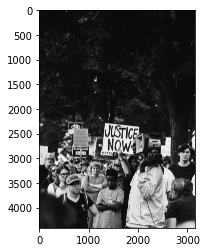

In [54]:
plt.imshow(image_protest_gray, cmap='gray')

In [55]:
image_protest_recolor = cv2.cvtColor(image_protest_gray, cv2.COLOR_GRAY2BGR)

In [62]:
ffd = dlib.get_frontal_face_detector()
detected = ffd(image_protest_gray.astype(np.uint8), 0)

def dlib_to_cv_bounding_box(box):
    x = box.left()
    y = box.top()
    w = box.right() - x
    h = box.bottom() - y
    return x, y, w, h


for face in detected:
    x, y, w, h = dlib_to_cv_bounding_box(face)
    cv2.rectangle(image_protest_recolor, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [63]:
detected

rectangles[[(1074, 3164) (1223, 3313)], [(2837, 2813) (3052, 3028)], [(424, 3243) (639, 3458)], [(1846, 3040) (2025, 3220)], [(1332, 3386) (1547, 3601)], [(639, 3482) (854, 3697)], [(134, 2961) (313, 3140)], [(611, 2973) (697, 3059)]]

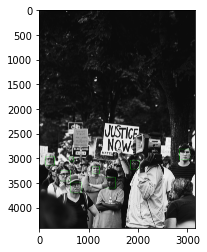

In [65]:
plt.imshow(image_protest_recolor)

In [66]:
cv2.imwrite('protest_faces.jpg', image_protest_recolor)

True

In [67]:
protest = mpimg.imread('pictures/protest_faces.jpg')

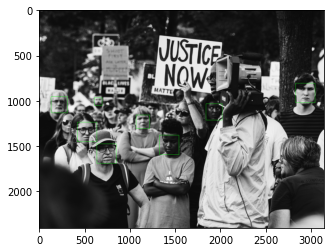

In [68]:
plt.imshow(protest)